Der Datensatz der für diese Auswertung verwendet wurde ist hier zu finden: https://www.kaggle.com/datasets/adityakadiwal/water-potability

------------------------
### Bibiliotheken importieren

In [179]:
# Basic Libraries
import numpy as np
import pandas as pd
import missingno as msno

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,f1_score
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold

------------------------
### Datensatz laden und Deskriptive Statistik

In [129]:
csv_file_path = 'water_potability.csv'
water_data = pd.read_csv(csv_file_path)

#display the data
water_data = pd.read_csv(csv_file_path)
water_data.describe().style.background_gradient(cmap="Blues")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Insgesamt gibt es 3276 Dateneinträge**

1. **ph:**
  - Der durchschnittliche pH-Wert liegt bei 7,08 was leicht saures bis neutrales Wasser anzeigt.
  - Die Standardabweichung von 1,59 deutet auf einen relativ großen Bereich von pH-Werten hin.
  - Der minimale pH-Wert liegt bei 0,0, was extrem niedrig ist und wahrscheinlich ein Ausreißer oder ein Messfehler ist.
  - Der maximale pH-Wert liegt bei 14,0 was extrem hoch ist und ebenfalls wahrscheinlich ein Ausreißer oder ein Messfehler ist.

2. **Hardness:**
  - Die durchschnittliche Härte beträgt 196,37 mg/L, was auf mäßig hartes Wasser hinweist.
  - Die Standardabweichung von 32,88 mg/L deutet auf einen relativ engen Bereich von Härtewerten hin.
  - Die minimale Härte beträgt 47,43 mg/L und die maximale 323,12 mg/L, was auf einen weiten Bereich von Härtegraden hinweist.

3. **Solids (TDS):**
  - Der durchschnittliche TDS-Wert liegt bei 22.014,09 mg/L, was sehr hoch ist und auf eine erhebliche Menge an gelösten Feststoffen im Wasser hinweist.
  - Die Standardabweichung von 8.768,57 mg/L deutet auf einen breiten Bereich von TDS-Werten hin.
  - Der minimale TDS-Wert liegt bei 320,94 mg/L und der maximale Wert bei 61.227,20 mg/L, was auf einen sehr breiten Bereich von TDS-Werten hinweist.

4. **Chloramines:**
  - Der durchschnittliche Chloraminwert liegt bei 7,12 mg/L, was sehr hoch ist.
  - Die Standardabweichung von 1,58 mg/L deutet auf einen relativ engen Bereich von Chloraminwerten hin.
  - Der minimale Chloraminwert beträgt 0,35 mg/L und der maximale Wert liegt bei 13,13 mg/L, was auf einen weiten Bereich von Chloraminkonzentrationen hinweist.

5. **Sulfate:**
  - Der durchschnittliche Sulfatwert liegt bei 333,78 mg/L, was sehr hoch ist.
  - Die Standardabweichung von 41,42 mg/L deutet auf einen relativ engen Bereich von Sulfatwerten hin.
  - Der minimale Sulfatwert beträgt 129,0 mg/L und der maximale Wert 481,03 mg/L, was auf einen moderaten Bereich von Sulfatkonzentrationen hinweist.

6. **Conductivity:**
  - Die durchschnittliche Leitfähigkeit beträgt 426,21 μS/cm, was relativ hoch ist und auf eine erhebliche Menge an gelösten Ionen im Wasser hinweist.
  - Die Standardabweichung von 80,82 μS/cm deutet auf einen mäßig breiten Bereich von Leitfähigkeitswerten hin.
  - Die minimale Leitfähigkeit beträgt 181,48 μS/cm und die maximale Leitfähigkeit 753,34 μS/cm, was auf einen breiten Bereich von Leitfähigkeitswerten hinweist.

7. **Organic Carbon:**
  - Der durchschnittliche Gehalt an organischem Kohlenstoff beträgt 14,28 mg/L, was sehr hoch ist.
  - Die Standardabweichung von 3,31 mg/L deutet auf einen relativ engen Bereich der organischen Kohlenstoffwerte hin.
  - Der minimale Gehalt an organischem Kohlenstoff beträgt 2,2 mg/L und der maximale Wert 28,3 mg/L, was auf einen moderaten Bereich der organischen Kohlenstoffkonzentration hinweist.

8. **Trihalomethanes:**
  - Der durchschnittliche Trihalomethangehalt beträgt 66,40 μg/L, was im  üblichen Bereich für Trinkwasser liegt.
  - Die Standardabweichung von 16,18 μg/L deutet auf einen relativ engen Bereich von Trihalomethanwerten hin.
  - Der minimale Trihalomethangehalt beträgt 0,74 μg/L und der maximale Wert liegt bei 124,0 μg/L, was auf einen breiten Bereich von Trihalomethankonzentration hinweist.

9. **Turbidity:**
  - Die durchschnittliche Trübung beträgt 3,97 NTU, was im typischen Bereich für Trinkwasser liegt.
  - Die Standardabweichung von 0,78 NTU deutet auf einen relativ engen Bereich von Trübungswerten hin.
  - Die minimale Trübung beträgt 1,45 NTU und die maximale Trübung 6,74 NTU, was auf einen moderaten Bereich von Trübungswerten hinweist.

----------------
### Trinkbar vs. nicht Trinkbar Barplot

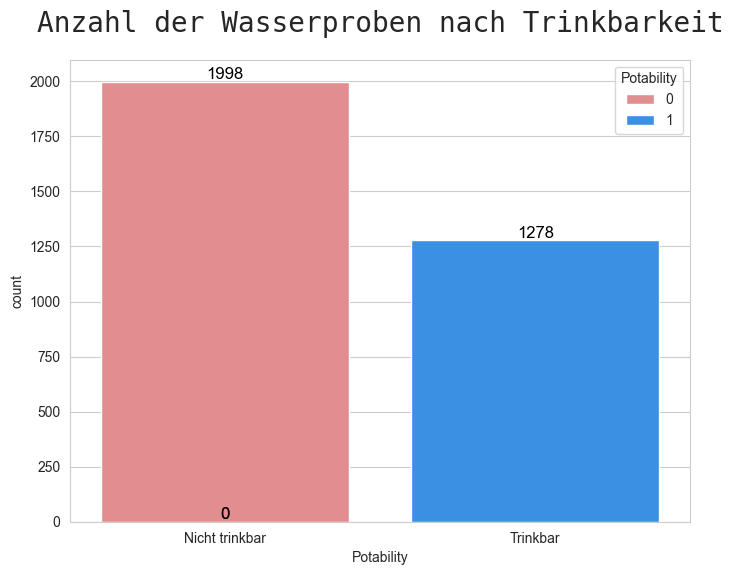

In [130]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Potability', data=water_data, hue='Potability', palette=['lightcoral', 'dodgerblue'])

# Rename the x-axis labels
ax.set_xticklabels(['Nicht trinkbar', 'Trinkbar'])

# Set the title of the plot
plt.title('Anzahl der Wasserproben nach Trinkbarkeit', font='monospace', fontsize=20, pad=20)

# Label the axes
#plt.xlabel('Trinkbarkeit', font='monospace', fontsize=14, labelpad=20)
#plt.ylabel('Anzahl der Proben', font='monospace', fontsize=14, labelpad=20)

# Annotate the count above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

--------------------------
### Korrelationskoeffizienten Analyse:

**Ziel:** Das Hauptziel der Analyse von Korrelationskoeffizienten ist es, den Zusammenhang bzw. die Stärke und Richtung der Beziehung zwischen zwei Variablen in einem Datensatz zu untersuchen.


Durch die Berechnung von Korrelationskoeffizienten wie Pearson, Spearman oder anderen Maßen können folgende Punkte analysiert werden:

**Stärke der Beziehung erkennen:** Wie stark korrelieren zwei Variablen miteinander? Je näher der Korrelationskoeffizient an +1 oder -1 liegt, desto stärker ist die Beziehung.

**Richtung der Beziehung bestimmen:** Ist die Beziehung positiv (beide Variablen bewegen sich in die gleiche Richtung) oder negativ (Variablen bewegen sich gegenläufig)?

**Lineare Zusammenhänge identifizieren:** Korrelationen zeigen an ob zwischen den Variablen ein linearer Zusammenhang besteht.

**Redundante Variablen erkennen:** Sehr hoch korrelierende Variablen können redundant sein, was bei Modellen zu Problemen führen kann.

**Datenexploration und Generierung von Hypothesen:** Hohe oder niedrige Korrelationen können Ausgangspunkt für weitere Analysen und Untersuchungen potenzieller Kausalzusammenhänge sein (datatab, 2024)

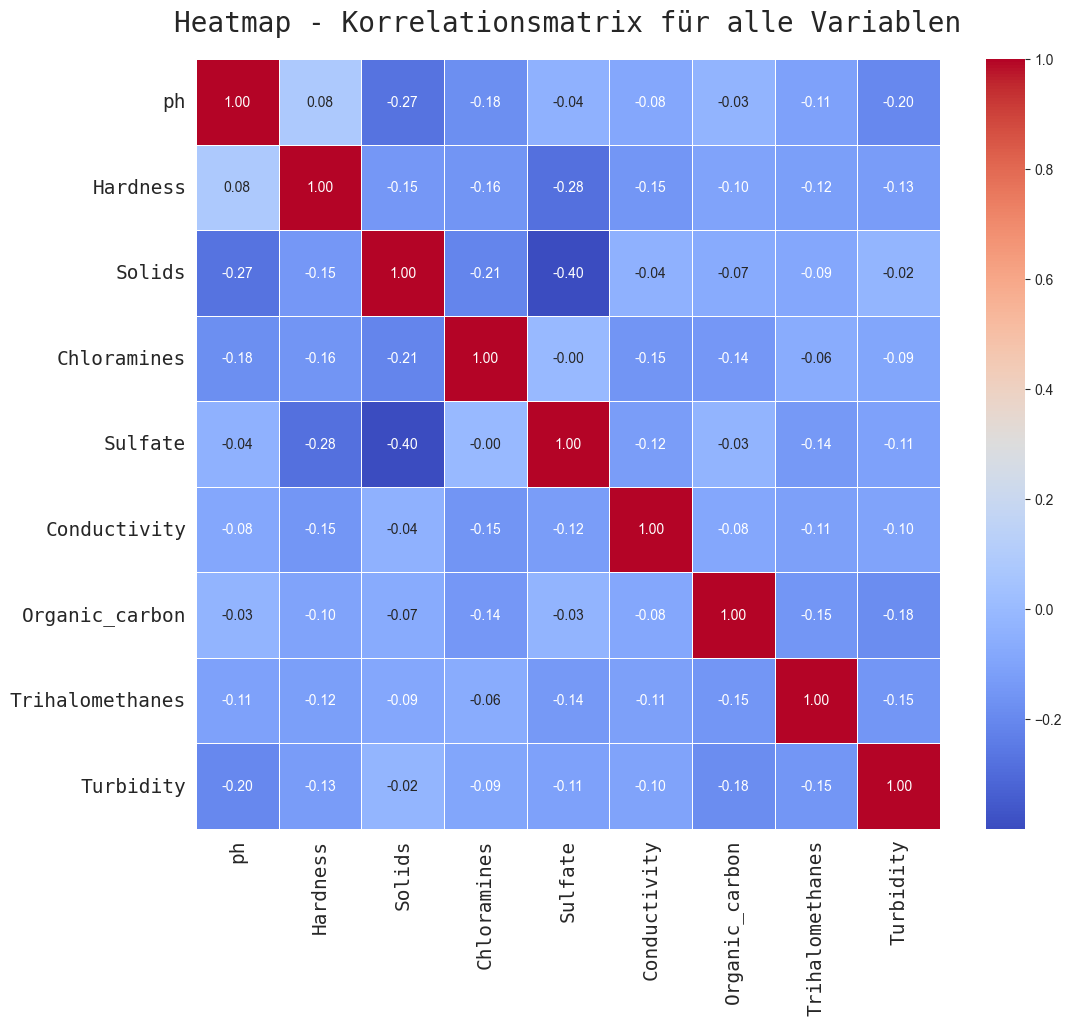

In [4]:
cor=water_data.drop('Potability',axis=1).corr()
corr_matrix = cor.corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap - Korrelationsmatrix für alle Variablen",font="monospace",fontsize=20, pad=20)
plt.xticks(font="monospace", fontsize=14)
plt.yticks(font="monospace", fontsize=14)
plt.show()

#### Ergebnis:

Wie man sieht ist die Heatmap ziemlich kalt (blau), es gibt also keinen Hinweis auf eine positive Korrelation zwischen den Variablen.

Allgemein in einer Korrelationsmatrix als Heatmap:
Zeilen = y-Achse
Spalten = x-Achse

Es besteht eine mittlere negative Korrelation von -0.40 zwischen der Variable "Solids" und der Variable "Sulfate".

Mit anderen Worten, höhere Werte von "Solids" gehen tendenziell mit niedrigeren Werten von "Sulfate" einher und umgekehrt.

-----------
### Scatter Plots: 

Wir erstellen Scatter Plots (Streudiagramme) um die Beziehung zwischen der Trinkbarkeit und anderen Variablen wie pH-Wert, Härte, gelösten Feststoffen, Chloraminen usw. zu visualisieren. Dies kann dabei helfen potenzielle lineare oder nicht-lineare Zusammenhänge zu identifizieren.

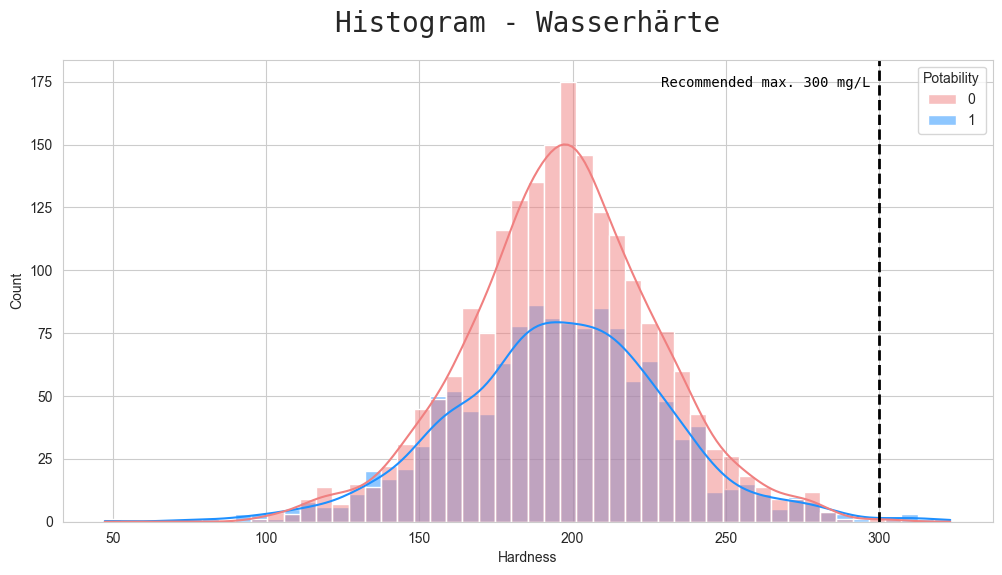

In [5]:
palette = {0: "lightcoral", 1: "dodgerblue"}

# Create a histogram for hardness vs. water quality
plt.figure(figsize=(12, 6))
plt.title("Histogram - Wasserhärte",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Hardness', hue='Potability', kde=True, palette=palette)
plt.axvline(x=300, color='black', linestyle='--', linewidth=2)
plt.text(297, plt.gca().get_ylim()[1]*0.95, 'Recommended max. 300 mg/L', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

Die **Wasserhärte** wird hauptsächlich durch Calcium- und Magnesiumsalze verursacht. Diese Salze werden aus geologischen Ablagerungen gelöst durch die das Wasser fließt. Die Dauer in der das Wasser mit dem härteverursachenden Material in Kontakt ist bestimmt den Härtegrad des Rohwassers (Ansel, 2005).

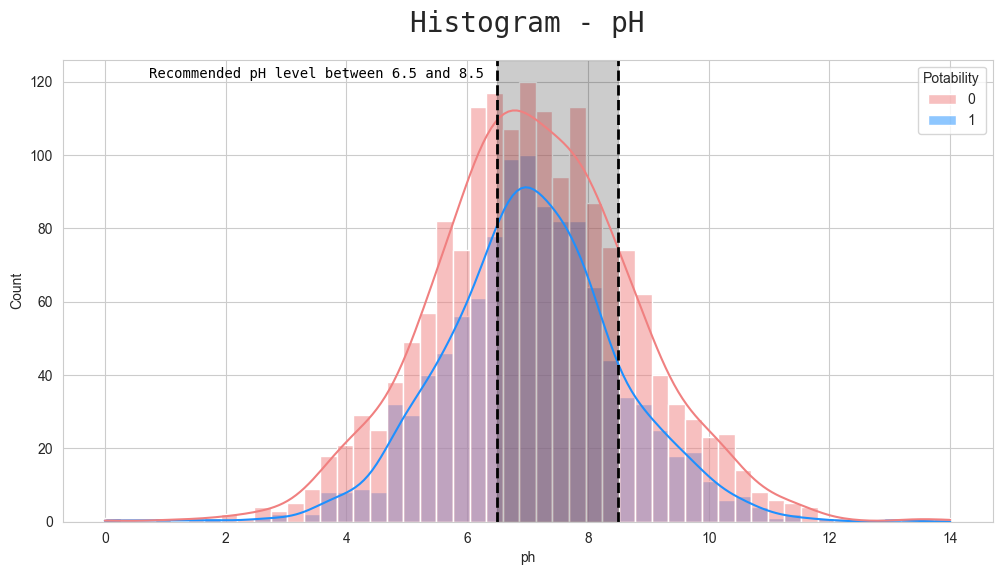

In [6]:
# Histogram of ph
plt.figure(figsize=(12, 6))
plt.title("Histogram - pH", font="monospace", fontsize=20, pad=20)
sns.histplot(data=water_data, x='ph', hue='Potability', kde=True, palette=palette)
plt.axvline(x=6.5, color='black', linestyle='--', linewidth=2)
plt.axvline(x=8.5, color='black', linestyle='--', linewidth=2)
plt.axvspan(6.5, 8.5, alpha=0.2, color='black')
plt.text(3.5, plt.gca().get_ylim()[1]*0.97, 'Recommended pH level between 6.5 and 8.5', 
         color='black', ha='center', va='center', fontsize=10, fontname='monospace')
plt.show()

Der **pH-Wert** der meisten Trinkwasserproben liegt im Bereich von 6,5 bis 8,5. Natürliche Gewässer können einen niedrigeren pH-Wert aufweisen, beispielsweise aufgrund von saurem Regen oder einen höheren pH-Wert in Kalksteingebieten (WHO, 2017).

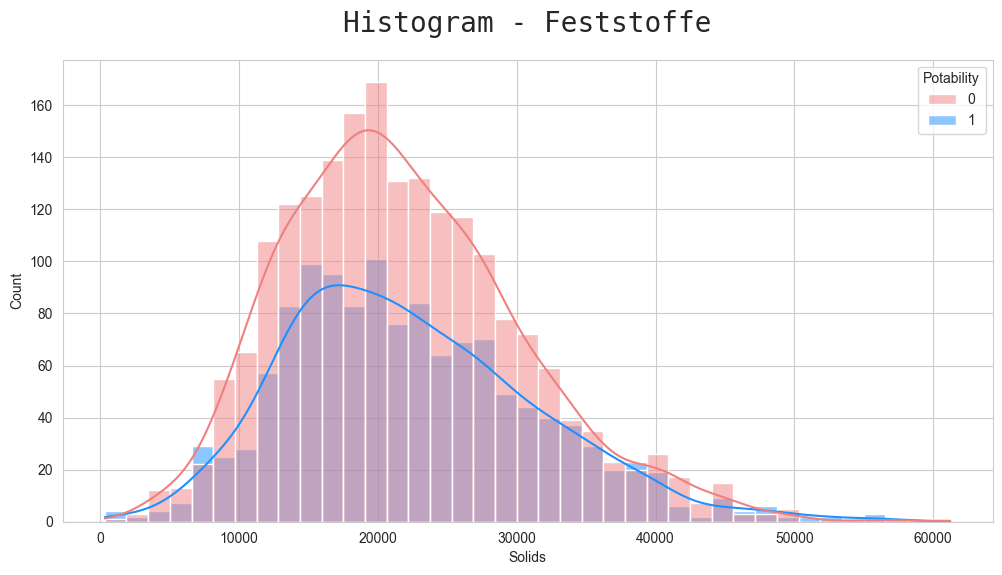

In [7]:
# Histogramm of solids
plt.figure(figsize=(12, 6))
plt.title("Histogram - Feststoffe",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Solids', hue='Potability', kde=True, palette=palette)
plt.show()

Die **Feststoffe** beziehen sich auf die Gesamtkonzentration von gelösten Substanzen im Wasser, wie z.B. anorganische Salze wie Calcium, Magnesium, Kalium und Natrium (WHO,2017).

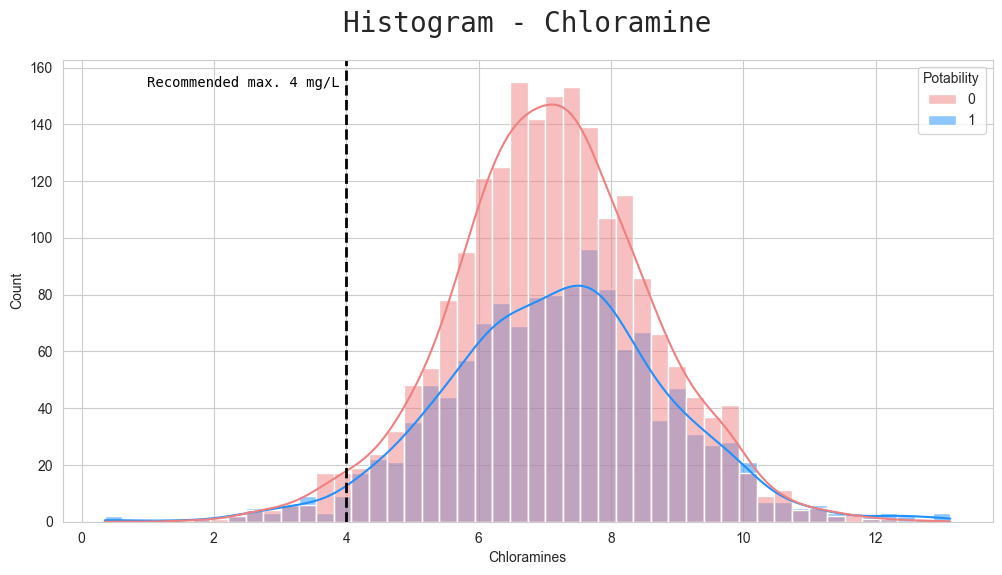

In [8]:
# Histogram of chloramines
plt.figure(figsize=(12, 6))
plt.title("Histogram - Chloramine",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Chloramines', hue='Potability', kde=True, palette=palette)
plt.axvline(x=4, color='black', linestyle='--', linewidth=2)
plt.text(3.90, plt.gca().get_ylim()[1]*0.95, 'Recommended max. 4 mg/L', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

**Chloramine** werden gebildet wenn Chlor zur Behandlung von Trinkwasser mit Ammoniak versetzt wird. Sie können zu Augen- und Nasenreizung, Magenbeschwerden (Sodbrennen, Übelkeit, Erbrechen, Magenschmerzen) und Anämie führen (EPA, 2023)

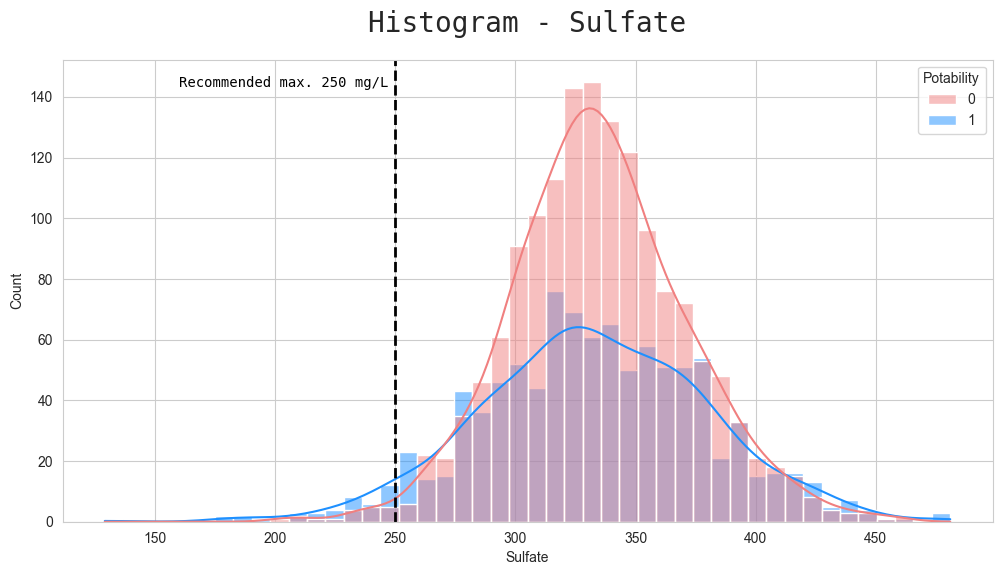

In [9]:
# Histogram of sulfate
plt.figure(figsize=(12, 6))
plt.title("Histogram - Sulfate",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Sulfate', hue='Potability', kde=True, palette=palette)
plt.axvline(x=250, color='black', linestyle='--', linewidth=2)
plt.text(247, plt.gca().get_ylim()[1]*0.95, 'Recommended max. 250 mg/L', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

**Sulfate** kommen häufig in natürlichen Wasserquellen vor und sind natürlicherweise in Mineralien, Böden und Gesteinen enthalten. Sie können auch über industrielle Abwässer in die Wasserversorgung gelangen. Sulfate gelten in normalen Konzentrationen nicht als giftig für den Menschen. Die Aufnahme von Wasser mit einem hohen Sulfatgehalt kann zu Durchfall und Dehydrierung führen, insbesondere bei Säuglingen (EPA, 2023).

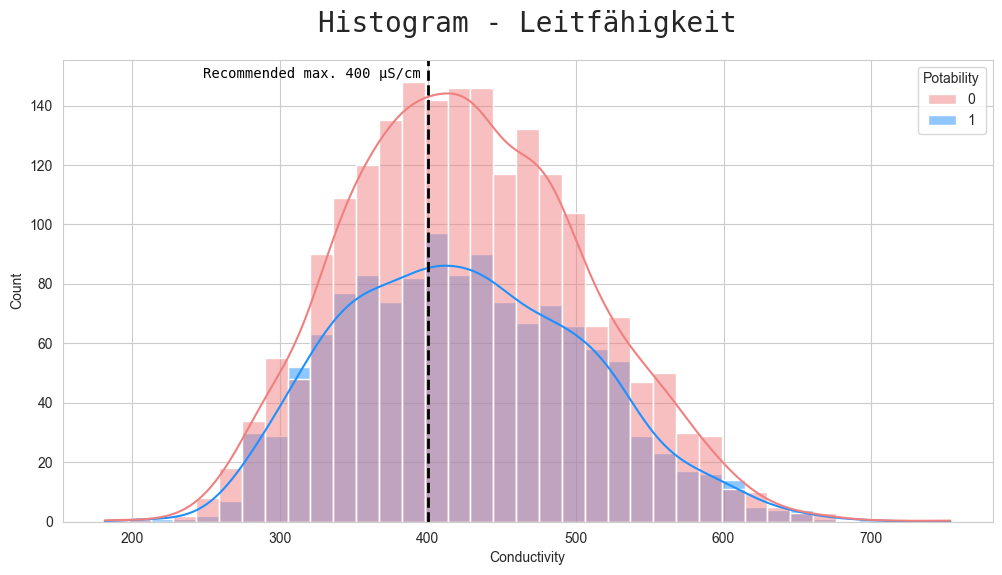

In [10]:
# Histogram of conductivity
plt.figure(figsize=(12, 6))
plt.title("Histogram - Leitfähigkeit",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Conductivity', hue='Potability', kde=True, palette=palette)
plt.axvline(x=400, color='black', linestyle='--', linewidth=2)
plt.text(395, plt.gca().get_ylim()[1]*0.97, 'Recommended max. 400 μS/cm', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

**Leitfähigkeit:** Reines Wasser ist kein guter Leiter für elektrischen Strom sondern eher ein guter Isolator, eine Erhöhung der Ionenkonzentration verstärkt die elektrische Leitfähigkeit von Wasser. Im Allgemeinen bestimmt die Menge der gelösten Feststoffe im Wasser die elektrische Leitfähigkeit (EPA, 2024)

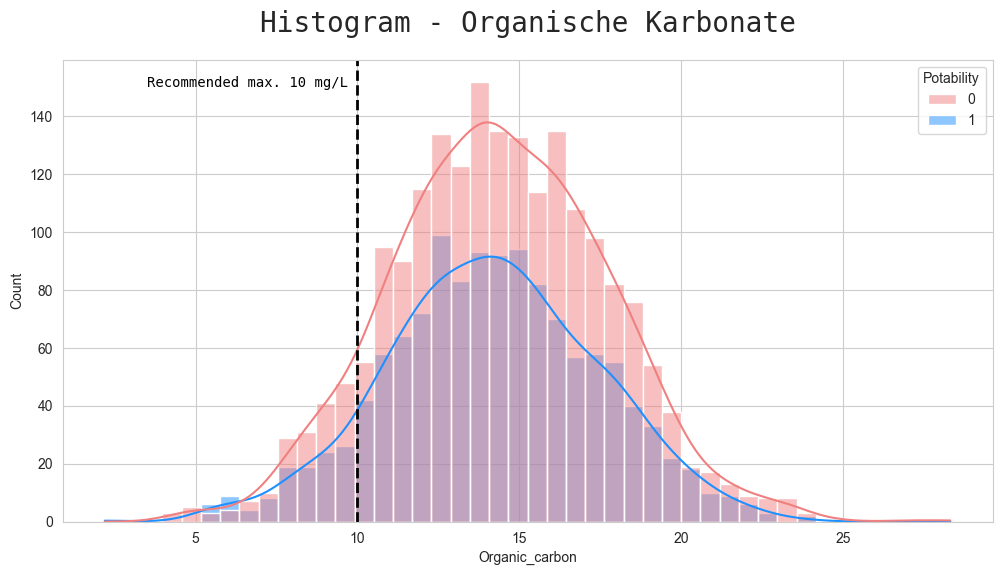

In [11]:
#Histogram of Organic Carbon
plt.figure(figsize=(12, 6))
plt.title("Histogram - Organische Karbonate",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Organic_carbon', hue='Potability', kde=True, palette=palette)
plt.axvline(x=10, color='black', linestyle='--', linewidth=2)
plt.text(9.7, plt.gca().get_ylim()[1]*0.95, 'Recommended max. 10 mg/L', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

**Organische Karbonate:** Sie sind ein Maß für die Gesamtmenge an organischem Kohlenstoff der im Wasser vorhanden ist, es ist ein wichtiger Parameter zur Beurteilung der Wasserqualität, insbesondere im Zusammenhang mit Trinkwasser und industriellen Prozessen. Sie stammen meist aus zersetzter natürlicher organischer Substanz sowie aus synthetischen Quellen (EPA, 2023).

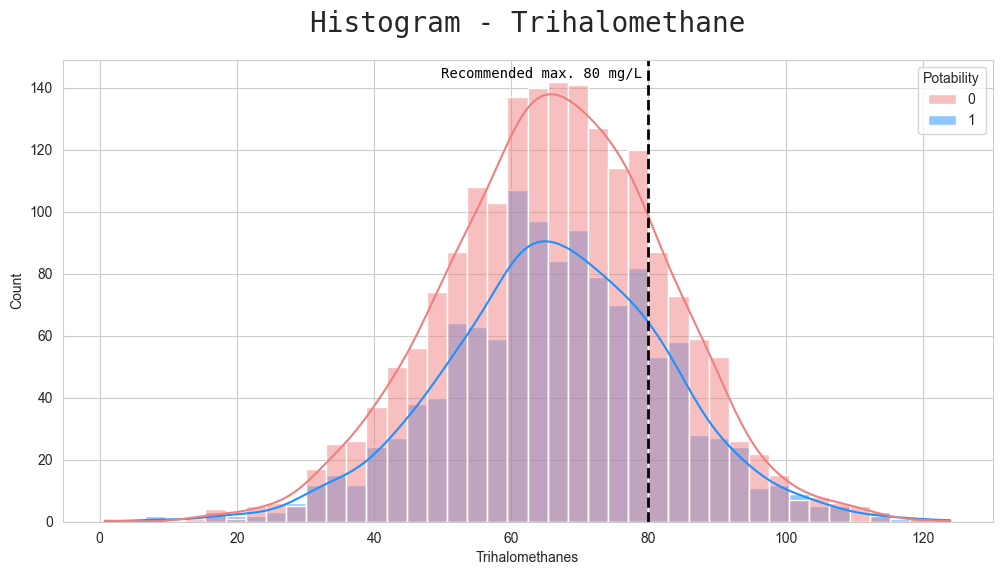

In [12]:
# Histogram of Trihalomethanes
plt.figure(figsize=(12, 6))
plt.title("Histogram - Trihalomethane",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Trihalomethanes', hue='Potability', kde=True, palette=palette)
plt.axvline(x=80, color='black', linestyle='--', linewidth=2)
plt.text(79, plt.gca().get_ylim()[1]*0.97, 'Recommended max. 80 mg/L', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

**Trihalomethane** sind Chemikalien die in chlorbehandeltem Wasser vorkommen können. Erhöhte **Trihalomethanwerte** werden mit Leber-, Nieren- oder Probleme mit dem zentralen Nervensystem und erhöhtem Krebsrisiko in Verbindung gebracht (EPA, 2023)

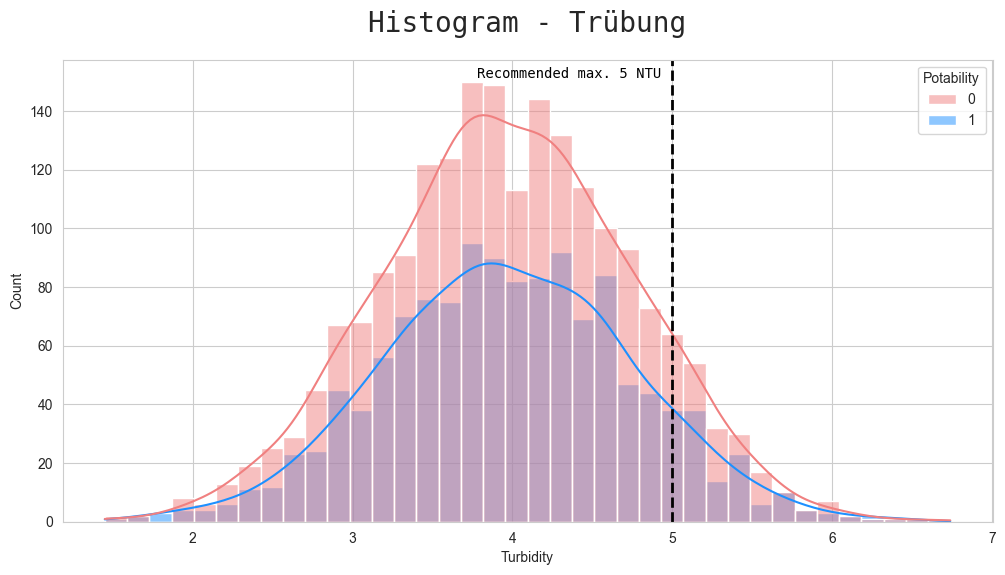

In [13]:
# Histogram of Turbidity
plt.figure(figsize=(12, 6))
plt.title("Histogram - Trübung",font="monospace",fontsize=20, pad=20)
sns.histplot(data=water_data, x='Turbidity', hue='Potability', kde=True, palette=palette)
plt.axvline(x=5, color='black', linestyle='--', linewidth=2)
plt.text(4.93, plt.gca().get_ylim()[1]*0.97, 'Recommended max. 5 NTU', color = 'black', ha='right', va='center', fontsize=10, fontname='monospace')
plt.show()

Höhere **Trübungswerte** werden oft mit einem höheren Gehalt an krankheitserregenden Mikroorganismen wie Viren, Parasiten und einigen Bakterien in Verbindung gebracht. Diese Organismen können Symptome wie Übelkeit, Krämpfe, Durchfall und Kopfschmerzen verursachen (EPA, 2023).

-----------
### Data Preprocessing: 

Das Data Preprocessing umfasst nicht nur die Bereinigung und Transformation von Daten, sondern auch die Organisation von Rohdaten um sie für das ML geeignet zu machen. Zu den Tasks gehören der Umgang mit fehlenden Werten, die Skalierung von Merkmalen, die Kodierung kategorischer Variablen sowie die Aufteilung der Daten in Trainings- und Testdatensätze.

In [14]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Es fehlen folgende Werte im Datensatz:**

* pH: 491
* Sulfate: 781
* Trihalomethanes: 162

In [15]:
water_data.isnull().sum() / len(water_data) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

**In Prozent:**

* ph: 14.98%
* Sulfate: 23.84%
* Trihalometahnes: 4.94%

Man könnte die fehlenden Werte auch entfernen, jedoch macht man das in Regel nur bei bis zu 3% an fehlenden Daten - ansonten haben wir größere einbußen beim Modeltraining

<Axes: >

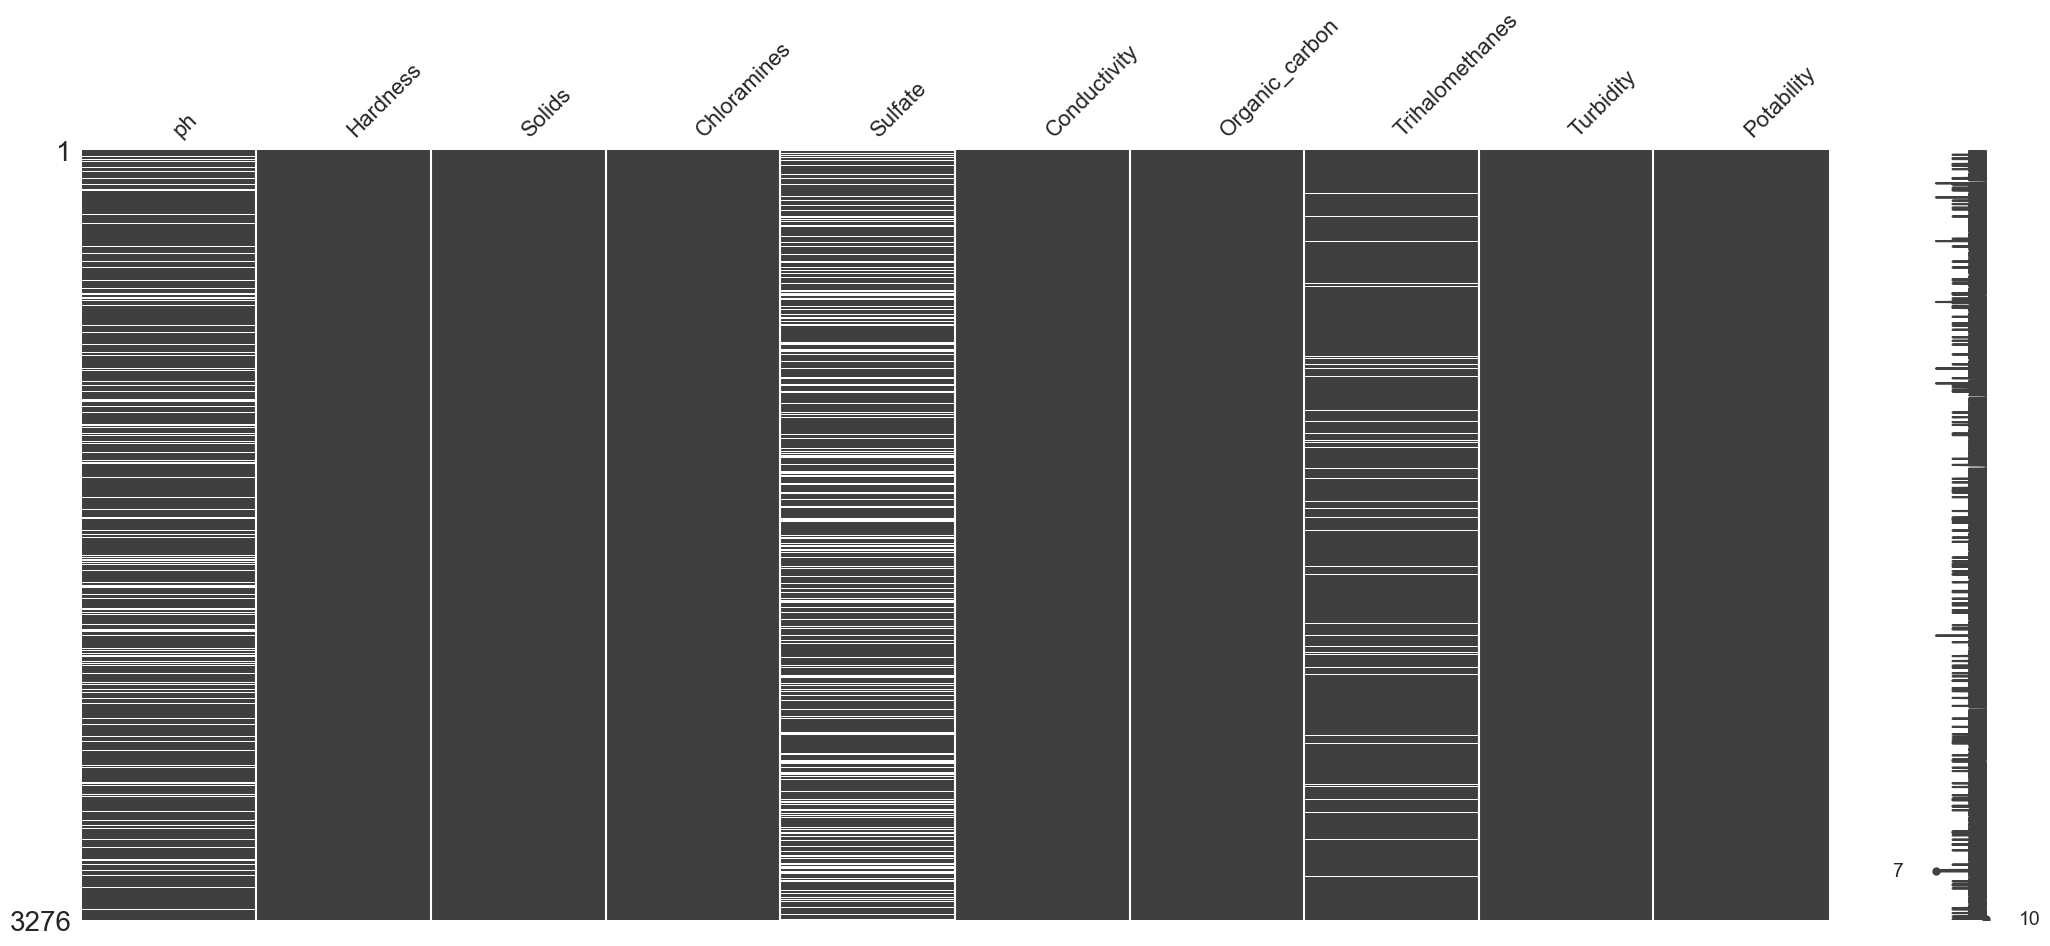

In [16]:
msno.matrix(water_data)

In [131]:
# Compare the difference between the means of Potability == 0 and Potability == 1
water_data[water_data['Potability'] == 0].describe().style.background_gradient(cmap="Blues")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.000000
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.000000
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.000000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.000000
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.000000
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.000000
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.000000


In [18]:
# Compare the difference between the means of Potability == 0 and Potability == 1
water_data[water_data['Potability'] == 1].describe().style.background_gradient(cmap="Blues")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.000000
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.000000
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.000000
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.000000
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.000000
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.000000
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.000000


------------
### Ersetzen NaN durch Median

In [132]:
water_data[water_data['Potability'] == 0][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [133]:
water_data[water_data['Potability'] == 1][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

Wir können sehen dass der Unterschied zwischen den Median-Werten von trinkbarem und nicht trinkbarem Wasser minimal ist. 
Daher verwenden wir den Median um die fehlenden Werte zu ersetzen.

In [134]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].median())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].median())
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].median())

water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

-----------
### Standardisieren

Da wir nun die fehlenden Werte ersetzt haben ist es an der Zeit alle numerischen Merkmale zu standardisieren. 

**Warum Standardisierung:** Standardisierung stellt sicher dass alle Merkmale gleich stark zum learning beitragen. Außerdem konvergieren viele Algorithmen schneller wenn die Merkmale standardisiert sind.

In [157]:
water_new = water_data.copy()
numeric_columns = water_new.select_dtypes(include=[np.number])

# Initialize the MinMaxScaler --> values between 0 and 1, since we have only positive values
scaler = MinMaxScaler()

numeric_columns_standardized = scaler.fit_transform(numeric_columns)
water_new[numeric_columns.columns] = numeric_columns_standardized
water_new

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120,1.0


***Test Daten für später ausschneiden:***

In [136]:

# Zufällige 5% der Daten auswählen
sample_rows = resample(water_new, replace=False, n_samples=int(0.02 * len(water_new)), random_state=42)

# Ausgewählte Daten als CSV-Datei speichern
sample_rows.to_csv('removed_data.csv', index=False)

# Verbleibende Daten in neuem DataFrame speichern
remaining_data = water_new.drop(sample_rows.index)

---------
### Modelling
Zuerst den Datensatz in 70% Trainingsset, 30% Validierungs- und Testset aufteilen.

In [158]:
# Ziel-Variable 'Potability' aus dem Datenrahmen entfernen
X = water_new.drop('Potability', axis=1)
y = water_new['Potability']

# Aufteilen in Trainings-(70%),(30%) Validierungs- und Test-Datensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Überprüfung der Größen der Datensätze
print(f"Trainingsset: {len(X_train)} Beispiele")
print(f"Testset: {len(X_test)} Beispiele")

Trainingsset: 2293 Beispiele
Testset: 983 Beispiele


Dann verschaft man sich eine grobe Übersicht welches der Modelle die beste Performance liefert.

In [159]:
#filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

[('SVC', 0.7073723914960321),
 ('RF', 0.6547798837121499),
 ('XGB', 0.6411417291996302),
 ('NuSVC', 0.6330215000820614),
 ('GNB', 0.5890578719526087),
 ('KNN', 0.586237779205024),
 ('ADA', 0.5764431109141124),
 ('Perc', 0.5642272262026612),
 ('DTC', 0.5368962339240082),
 ('NC', 0.5115112502899559),
 ('LR', 0.3138351983723296),
 ('SGDC', 0.3138351983723296),
 ('Ridge', 0.3138351983723296),
 ('BNB', 0.3138351983723296),
 ('PAC', 0.3138351983723296)]

Die Ergebnisse zeigen, dass **SVC, RF (Random Forest) und XGB (Gradient Boost)** die besten Leistungen erzielt haben. Der nächste Schritt wäre, die Hyperparameter dieser Modelle randomisiert zu optimieren um diese zu evaluieren und "fertig zu trainieren".

In [167]:

model_params = {
    'XGB': {
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.0001, 0.001, 0.01, 0.1],
            'n_estimators': [100, 200, 500, 1000],
            'max_features': ['sqrt', 'log2'],
            'max_depth': list(range(11))
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': list(range(1, 11))
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    }
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params['model'], params['params'], cv=cv, n_iter=20, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])
data = pd.DataFrame(scores, columns=['Model', 'Parameters', 'Score'])
data


python(13183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(13195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


,Model,Parameters,Score
0,XGB,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.659830
1,Random Forest,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.650024
2,SVC,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}",0.654823


In [168]:
scores

[['XGB',
  {'n_estimators': 500,
   'max_features': 'sqrt',
   'max_depth': 7,
   'learning_rate': 0.01},
  0.6598296086993749],
 ['Random Forest',
  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10},
  0.6500237843803218],
 ['SVC', {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}, 0.6548229966416456]]

Wir sehen das **XGB Model** hat die besten Ergebnisse bei den Testdaten erzielt, nun werden wir die Parameter übernehmen, dies tunen und evaluieren um unser finales Model zu bekommen.

In [178]:
# Beste Hyperparameter für XGBoost aus der Randomized Search
best_xgb_params = {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.01}

# XGBoost-Modell mit besten Hyperparametern initialisieren
xgb_model = GradientBoostingClassifier(**best_xgb_params)

# Kreuzvalidierung für Modellbewertung
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

# Listen zum Speichern der Metriken
f1_scores = []
precision_scores = []
accuracy_scores = []

# Kreuzvalidierung durchführen
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Modell trainieren
    xgb_model.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = xgb_model.predict(X_test)
    
    # Metriken berechnen und speichern
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Durchschnittliche Metriken berechnen
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision_score = sum(precision_scores) / len(precision_scores)
avg_accuracy_score = sum(accuracy_scores) / len(accuracy_scores)

print(f"Durchschnittlicher F1-Score: {avg_f1_score:.4f}")
print(f"Durchschnittliche Precision: {avg_precision_score:.4f}")
print(f"Durchschnittliche Accuracy: {avg_accuracy_score:.4f}")


Durchschnittlicher F1-Score: 0.4111
Durchschnittliche Precision: 0.6668
Durchschnittliche Accuracy: 0.6674


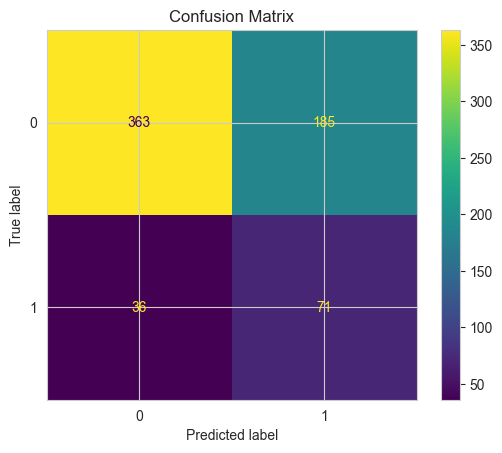

In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(xgb_model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [176]:
feature_importances=xgb_model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
4,Sulfate,0.155367
0,ph,0.154035
3,Chloramines,0.132582
1,Hardness,0.131522
2,Solids,0.112774
6,Organic_carbon,0.085221
5,Conductivity,0.084857
7,Trihalomethanes,0.074675
8,Turbidity,0.068966


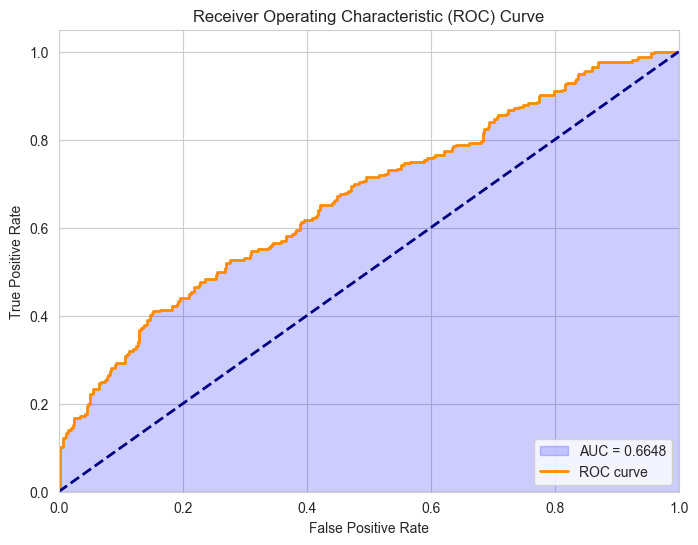

In [180]:
# Calculate ROC curve and AUC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.fill_between(fpr, tpr, color='blue', alpha=0.2, label= f"AUC = {roc_auc:.4f}")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

### Source: 
* Ansell, R.O. (2005). ION-SELECTIVE ELECTRODES | Water Applications. Encyclopedia of Analytical Science (Second Edition), 7, 540-545
* datatab. (2024). Korrelationsanalyse. https://datatab.de/tutorial/korrelation
* Environmental Protection Agency (EPA). (2023). National Primary Drinking Water Regulations. https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations
* Environmental Protection Agency (EPA). (2024). Indicators: Conductivity. https://www.epa.gov/national-aquatic-resource-surveys/indicators-conductivity
* Weltgesundheitsorganisation (WHO). (2017). Guidelines for drinking-water quality - 4th edition. https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/tds.pdf?sfvrsn=3e6d651e_4